# Problem Statement

    - To find the hot leads from the leads pool by assigning a lead score
    - Lead score to range between 0 - 100

## Setup

In [993]:
#Importing libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [994]:
import warnings
warnings.filterwarnings('ignore')

In [995]:
#Style Setup
plt.style.use('fivethirtyeight')
sns.set_style('dark')
sns.set_context('notebook')

#View Setup
pd.set_option("display.max_columns", 40)

## Importing Data

    - First sample data is imported
    - Datatypes of each column is downcasted
    - Complete data is imported as memory optimized

### Sample data importing

In [996]:
#Importing 100 lines of data
sample_df = pd.read_csv('Leads.csv', nrows=100)
sample_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15,15,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15,15,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14,20,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13,17,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15,18,No,No,Modified


In [997]:
sample_df.shape

(100, 37)

In [998]:
#Standard dtypes of each column
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    100 non-null    object 
 1   Lead Number                                    100 non-null    int64  
 2   Lead Origin                                    100 non-null    object 
 3   Lead Source                                    100 non-null    object 
 4   Do Not Email                                   100 non-null    object 
 5   Do Not Call                                    100 non-null    object 
 6   Converted                                      100 non-null    int64  
 7   TotalVisits                                    96 non-null     float64
 8   Total Time Spent on Website                    100 non-null    int64  
 9   Page Views Per Visit                           96 non-n

In [999]:
sample_df.isnull().sum()

Prospect ID                                       0
Lead Number                                       0
Lead Origin                                       0
Lead Source                                       0
Do Not Email                                      0
Do Not Call                                       0
Converted                                         0
TotalVisits                                       4
Total Time Spent on Website                       0
Page Views Per Visit                              4
Last Activity                                     4
Country                                          19
Specialization                                   10
How did you hear about X Education               13
What is your current occupation                  17
What matters most to you in choosing a course    17
Search                                            0
Magazine                                          0
Newspaper Article                                 0
X Education 

In [1000]:
#Downcasting the datatype
col_name = sample_df.columns
dtypes_name = sample_df.dtypes

col_list = list(zip(col_name, dtypes_name))

for i,j in col_list:
    if j == 'object' :
        sample_df[i] = sample_df[i].astype('category')
    elif j == 'int64' :
        sample_df[i] = pd.to_numeric(sample_df[i], downcast = 'unsigned', errors = 'ignore')
    else :
        sample_df[i] = pd.to_numeric(sample_df[i], downcast = 'float', errors = 'ignore')

In [1001]:
#Downcasted sample df
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Prospect ID                                    100 non-null    category
 1   Lead Number                                    100 non-null    uint32  
 2   Lead Origin                                    100 non-null    category
 3   Lead Source                                    100 non-null    category
 4   Do Not Email                                   100 non-null    category
 5   Do Not Call                                    100 non-null    category
 6   Converted                                      100 non-null    uint8   
 7   TotalVisits                                    96 non-null     float32 
 8   Total Time Spent on Website                    100 non-null    uint16  
 9   Page Views Per Visit                        

**Assessment** - 50% memory optimized

### Importing memory optimized data

In [1002]:
dtype_opti_name = sample_df.dtypes
col_opti_name = dict(zip(col_name, dtype_opti_name))

#Columns have null value in data
#Hence resetting the datatype to a float
col_opti_name['Prospect ID'] = 'category'
col_opti_name['Asymmetrique Activity Score'] = 'float32'
col_opti_name['Asymmetrique Profile Score'] = 'float32'

leads = pd.read_csv('Leads.csv', dtype = col_opti_name)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1003]:
#Total rows 9240
#Total columns 37
leads.shape

(9240, 37)

In [1004]:
#Columns & Datatype
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Prospect ID                                    9240 non-null   category
 1   Lead Number                                    9240 non-null   uint32  
 2   Lead Origin                                    9184 non-null   category
 3   Lead Source                                    9121 non-null   category
 4   Do Not Email                                   9240 non-null   category
 5   Do Not Call                                    9238 non-null   category
 6   Converted                                      9240 non-null   uint8   
 7   TotalVisits                                    9103 non-null   float32 
 8   Total Time Spent on Website                    9240 non-null   uint16  
 9   Page Views Per Visit                     

**Assessment**
    - 2.8+ MB when data is imported directly
    - 885 kB when data is imported in optimized way

## Processing Data

### Null Value Treatment

In [1005]:
#Null-value count

tot_count = len(leads)

col_nul_list = []
null_list = []
null_norm_list = []
select_list = []

column_names = leads.columns
for i in column_names:
    if(leads[i].isnull().sum() > 0) | (leads[leads[i] == 'Select'].shape[0] > 0):
        col_nul_list.append(i)
        null_list.append(leads[i].isnull().sum())
        null_norm_list.append(round((leads[i].isnull().sum()/tot_count)*100, 2))
        
null_zip_list = list(zip(col_nul_list, null_list, null_norm_list))
null_df = pd.DataFrame(null_zip_list, columns = ['Parameter', 'Null #', 'Null %'])
null_df

,Parameter,Null #,Null %
0,Lead Origin,56,0.61
1,Lead Source,119,1.29
2,Do Not Call,2,0.02
3,TotalVisits,137,1.48
4,Page Views Per Visit,137,1.48
5,Last Activity,2863,30.98
6,Country,2743,29.69
7,Specialization,1495,16.18
8,How did you hear about X Education,2297,24.86
9,What is your current occupation,2724,29.48


There are columns which has option `Select` which is equal to `NaN`

In [1006]:
#Adding Select # & Select %
select_cnt = []
for i in null_df.Parameter:
    select_cnt.append(len(leads[leads[i] == 'Select']))

null_df['Select #'] = select_cnt
null_df['Select %'] = round((null_df['Select #']/tot_count) * 100, 2)
null_df['Total %'] = null_df['Null %'] + null_df['Select %']
null_df.drop(['Null #', 'Select #'], axis = 1)

,Parameter,Null %,Select %,Total %
0,Lead Origin,0.61,0.00,0.61
1,Lead Source,1.29,0.00,1.29
2,Do Not Call,0.02,0.00,0.02
3,TotalVisits,1.48,0.00,1.48
4,Page Views Per Visit,1.48,0.00,1.48
5,Last Activity,30.98,0.00,30.98
6,Country,29.69,0.00,29.69
7,Specialization,16.18,21.02,37.20
8,How did you hear about X Education,24.86,54.58,79.44
9,What is your current occupation,29.48,0.00,29.48


Method Employed to treat the Null Values
   - Columns having null value greater than 40 % **DROP COLUMNS**
   - Columns created by Sales team **DROP COLUMNS**
   - Columns having Skewness greater than or equal to 95% **DROP COLUMNS** 
   - Columns having lesser than 2 % null value **DROP NULL ROWS**
   - Columns having around 25 - 35 % ?

In [1007]:
#Creating the col list
more_than_40 = []
less_than_2 = []
othr_null_cat = []
for i in null_df.Parameter:
    val1 = str(null_df[null_df['Parameter'] == i]['Total %']).split('\n')
    val2 = float(val1[0].split(' ')[4])
    if val2 >= 40:
        more_than_40.append(i)
    elif val2<=2:
        less_than_2.append(i)
    else:
        othr_null_cat.append(i)
print('Equal or more than 40' , more_than_40)
print('')
print('Equal or less than 2', less_than_2)
print('')
print('Other columns', othr_null_cat)

Equal or more than 40 ['How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

Equal or less than 2 ['Lead Origin', 'Lead Source', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

Other columns ['Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Last Notable Activity']


Replacing all Select values with np.nan

In [1008]:
leads = leads.replace('Select', np.nan)

#### More than 40%

In [1009]:
leads.drop(more_than_40, axis=1, inplace = True)
leads.shape

(9240, 28)

#### Col to be removed as redudant

In [1010]:
sal_col = ['Prospect ID']
leads.drop(sal_col, axis=1, inplace = True)
leads.shape

(9240, 27)

#### Dropping the Rows with cumulative Null Count > 5

In [1011]:
row_null_per = []
row_null_cutoff = 5

for i in range(len(leads)) :
    if (leads.iloc[i].isnull().sum() >= row_null_cutoff):
        row_null_per.append(i)
        #print(i , leads.iloc[i].isnull().sum())
    
leads.drop(row_null_per, axis = 0, inplace = True)
leads.shape

(8895, 27)

#### Less than 2%

In [1012]:
#Dropping rows in columns with less than 2% missing values
for i in less_than_2:
    leads = leads[~(leads[i].isna())]
leads.shape

(8749, 27)

#### Dropping the skewed columns

In [1013]:
col_names = leads.columns
skewed_col = []
skew_cut_off = 0.95

for i in col_names:
    lal1 = str(leads[i].value_counts(normalize = True)).split('\n')
    lal2 = float(str(lal1[0].split(' ')[-1]))
    
    if lal2 >= skew_cut_off:
        skewed_col.append(i)
        #skewed_col.append(lal2)

skewed_col

['Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [1014]:
leads.drop(skewed_col, axis = 1, inplace = True)
leads.shape

(8749, 13)

The result after performing Missing value Treatment

In [1015]:
leads.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                             2556
Specialization                            3068
What is your current occupation           2454
A free copy of Mastering The Interview       0
Last Notable Activity                     2122
dtype: int64

**Assessment** - Still there are columns with large missing values but we cannot drop as they are critical to business problem.
Performing a median imputation also is not right as we would alter the raw data. Hence replacing the nan values with 'unknown'
and proceeding with next steps

In [1016]:
leads['Last Activity'].value_counts()

Email Opened                    3382
Olark Chat Conversation          885
Page Visited on Website          628
Converted to Lead                426
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       88
Unsubscribed                      58
Had a Phone Conversation          25
View in browser link Clicked       6
Name: Last Activity, dtype: int64

In [1017]:
leads['Specialization'].value_counts()

Finance Management                   951
Human Resource Management            828
Marketing Management                 819
Operations Management                491
Business Administration              392
IT Projects Management               365
Supply Chain Management              342
Banking, Investment And Insurance    334
Travel and Tourism                   200
Media and Advertising                200
International Business               175
Healthcare Management                153
Hospitality Management               110
E-COMMERCE                           108
Retail Management                    100
Rural and Agribusiness                73
Services Excellence                   40
Name: Specialization, dtype: int64

In [1018]:
leads['What is your current occupation'].value_counts()

Unemployed              5419
Working Professional     671
Student                  205
Name: What is your current occupation, dtype: int64

In [1019]:
leads['Last Notable Activity'].value_counts()

Modified                    3210
Email Opened                2781
Page Visited on Website      314
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  44
Unreachable                   31
Had a Phone Conversation      14
Name: Last Notable Activity, dtype: int64

#### Replacing nan with unknown

In [1020]:
nan_col = ['Last Activity', 'Specialization', 'What is your current occupation', 'Last Notable Activity']
for i in nan_col:
    leads[i] = leads[i].astype('object')
    leads[i] = leads[i].fillna('unknown')
leads.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [1021]:
leads.shape

(8749, 13)

**Assessment** - Final dataframe after all cleaning is 8749 Rows X 13 Columns from 9240 x 37 columns

## Visualizing Data

In [1022]:
leads.dtypes

Lead Number                                 uint32
Lead Origin                               category
Lead Source                               category
Do Not Email                              category
Converted                                    uint8
TotalVisits                                float32
Total Time Spent on Website                 uint16
Page Views Per Visit                       float32
Last Activity                               object
Specialization                              object
What is your current occupation             object
A free copy of Mastering The Interview    category
Last Notable Activity                       object
dtype: object

In [1023]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,unknown,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,unknown,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,unknown,Unemployed,No,Modified


In [1024]:
num_col = ['Lead Number', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
cat_col = list(set(leads.columns) - set(num_col))
cat_col

['What is your current occupation',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Converted',
 'Last Notable Activity',
 'A free copy of Mastering The Interview',
 'Lead Origin',
 'Specialization']

### Visualizing the numerical columns - Univariate

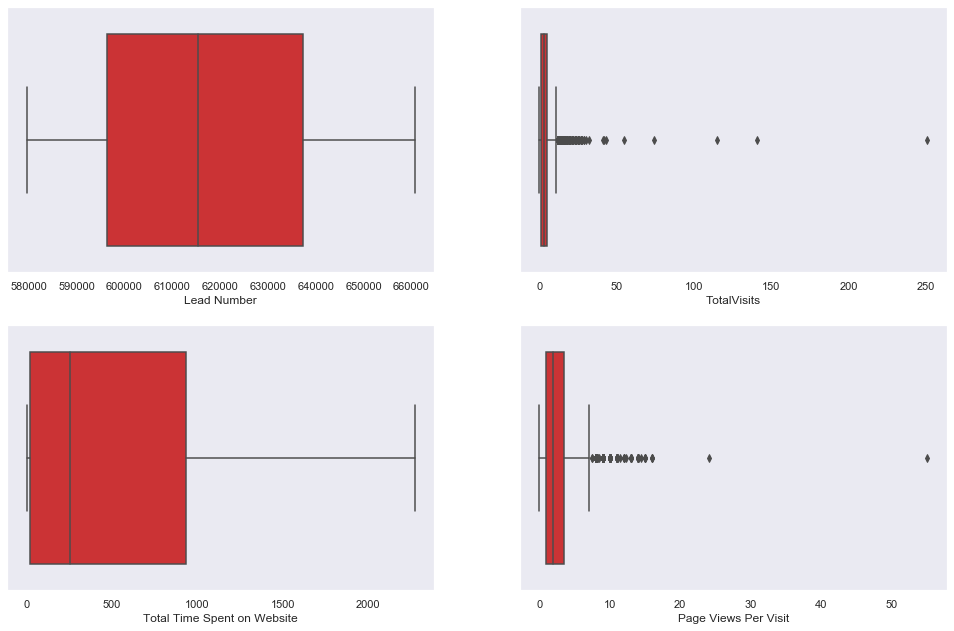

In [1025]:
plt.figure(figsize= (15, 10))
for i in enumerate(num_col):
    plt.subplot(2, 2, i[0]+1)
    sns.boxplot(leads[i[1]], orient="h", palette="Set1")

###  Visualizing the numerical columns - Bivariate

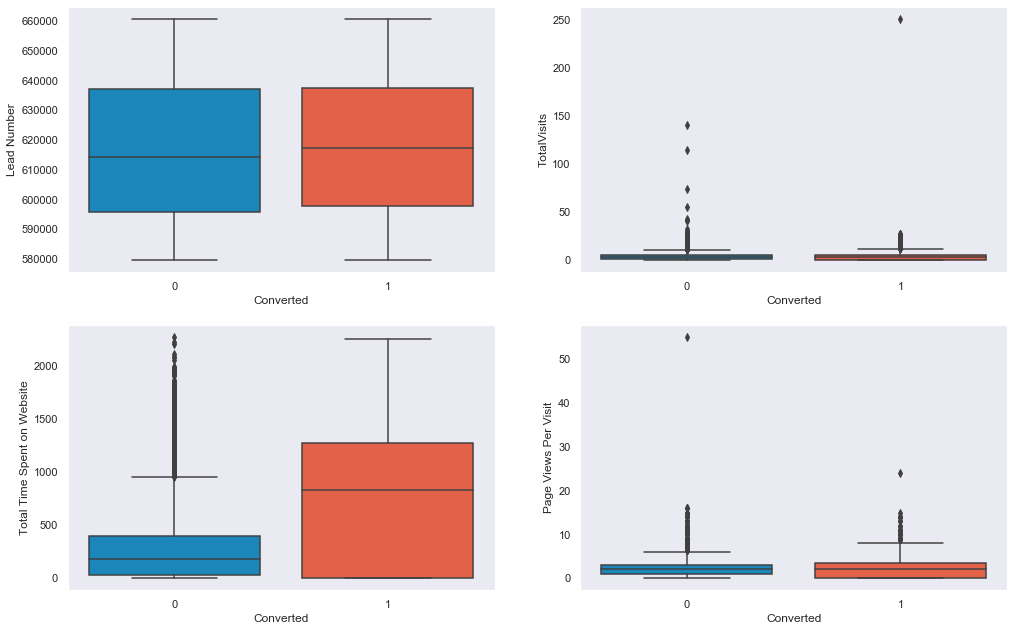

In [1026]:
plt.figure(figsize= (15, 10))
for i in enumerate(num_col):
    plt.subplot(2, 2, i[0]+1)
    sns.boxplot(x='Converted', y=i[1], data=leads)

### Visualizing the categorical columns - Univariate

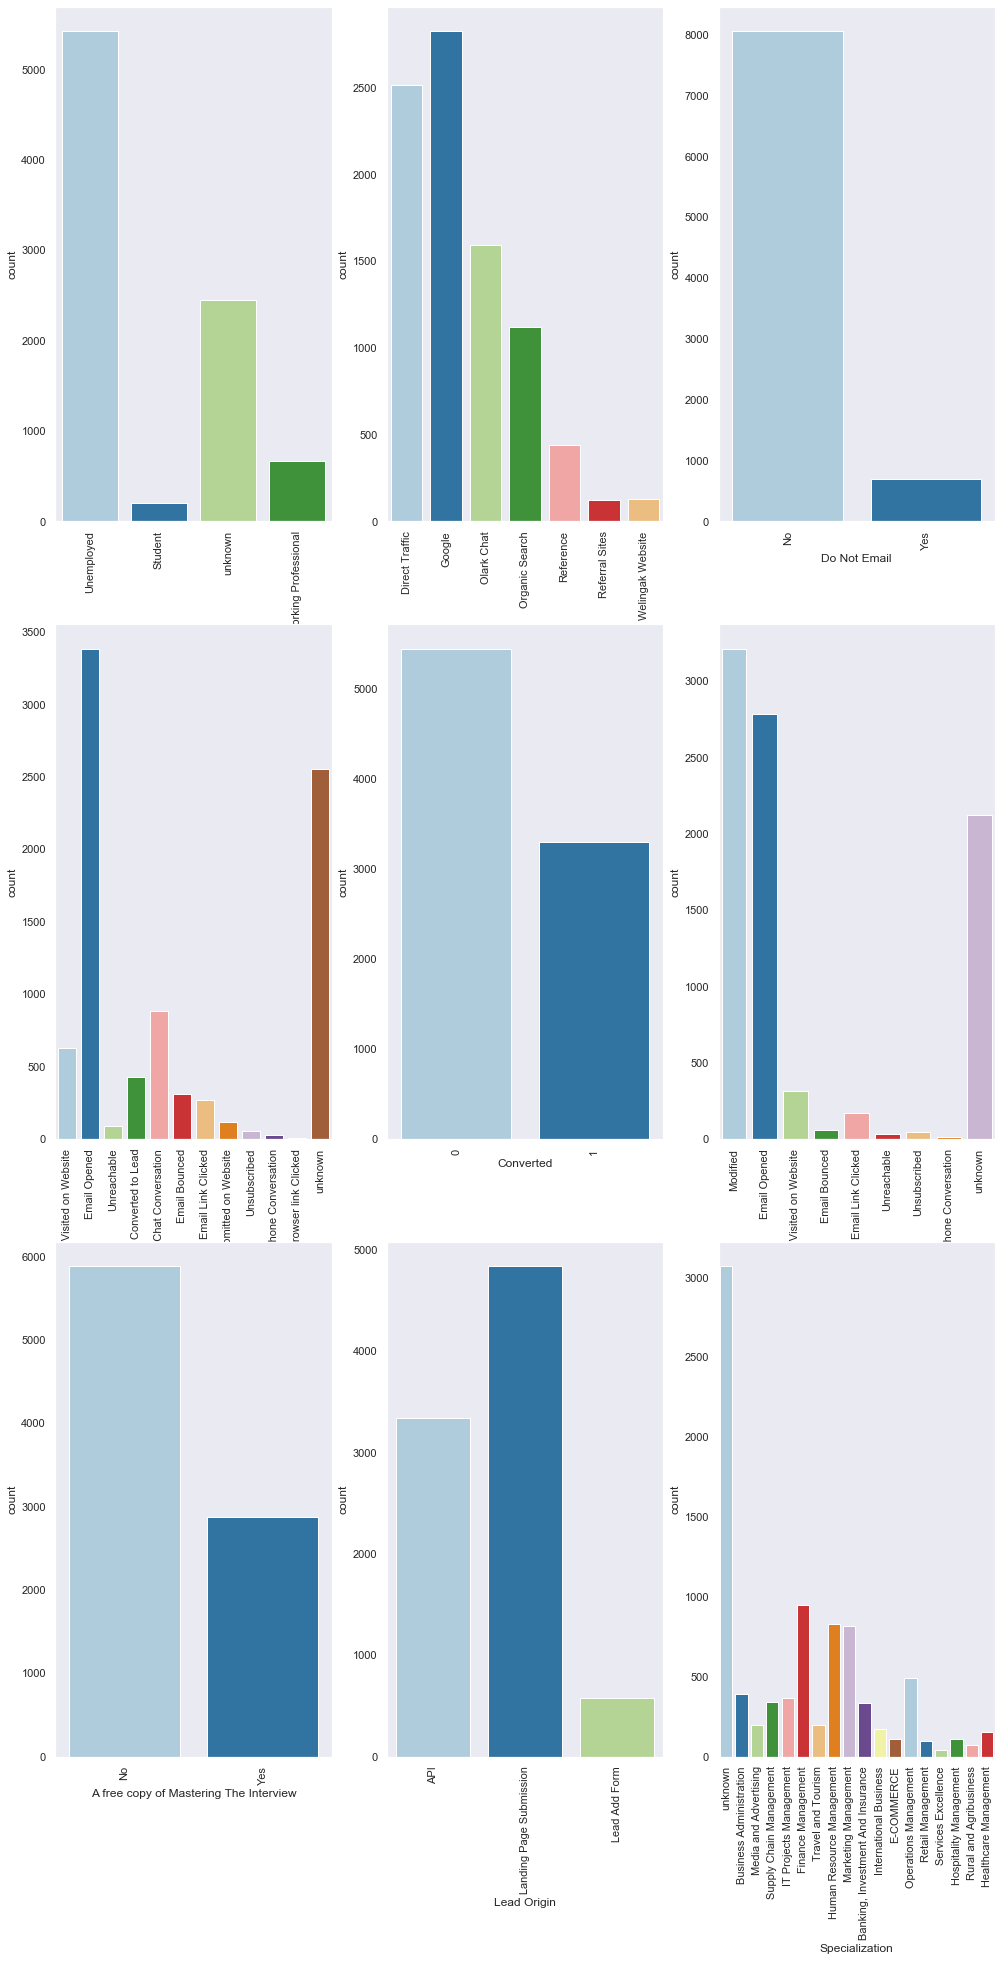

In [1027]:
plt.figure(figsize= (15, 30))
for i in enumerate(cat_col):
    plt.subplot(3, 3, i[0]+1)
    sns.countplot(leads[i[1]], palette='Paired')
    plt.xticks(rotation = 90)

### Visualizing the categorical columns - Bivariate

In [1028]:
def cat_col_bivariate_analysis(c1,c2):
    sns.catplot(col=c1 ,y=c2, data=leads, kind="count")
    plt.show()

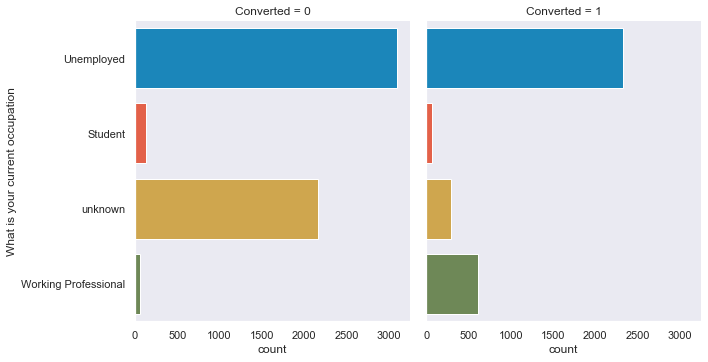

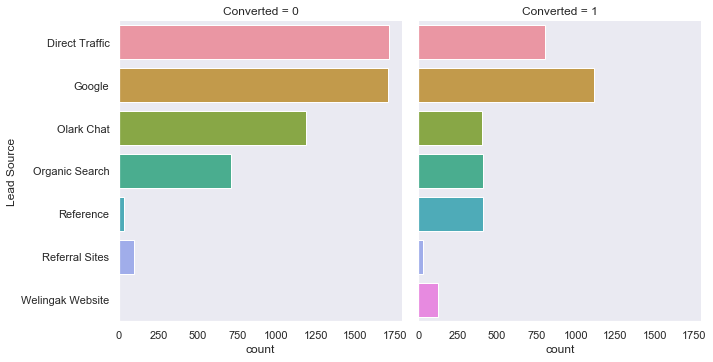

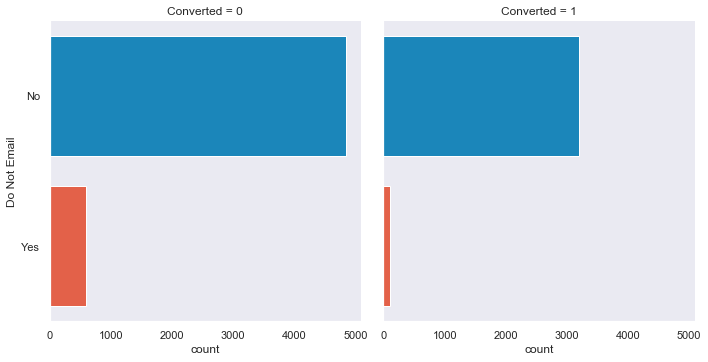

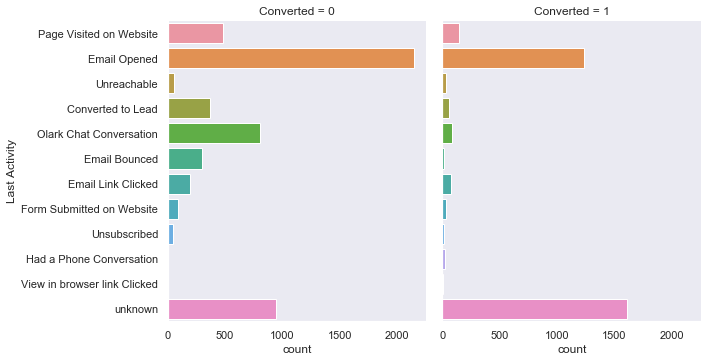

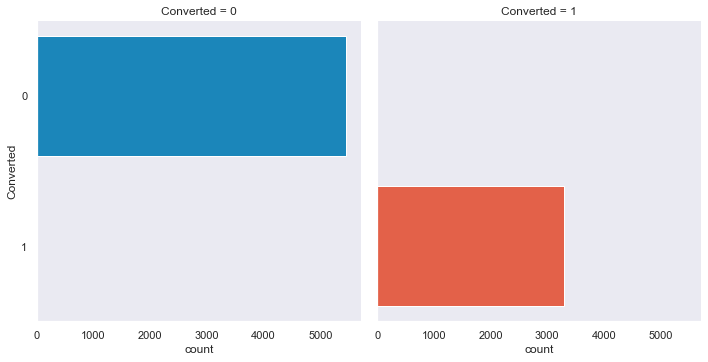

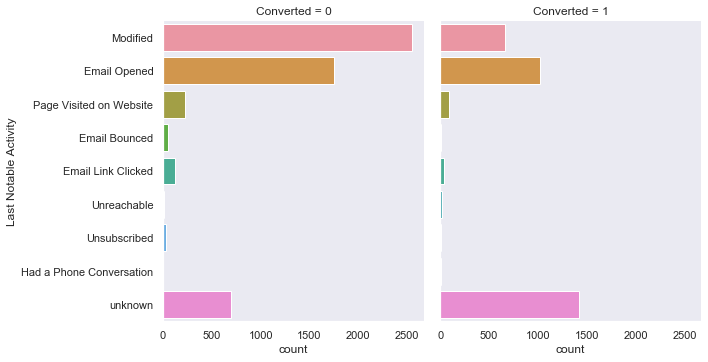

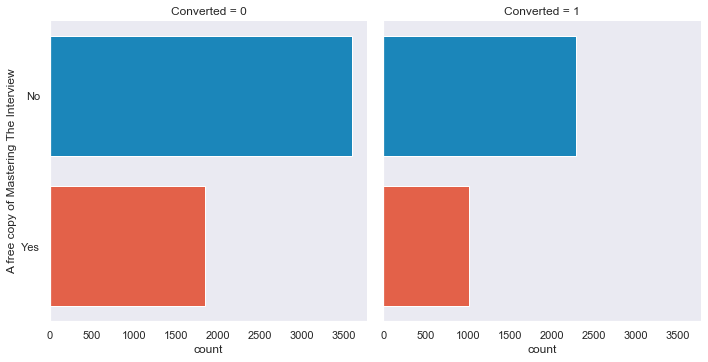

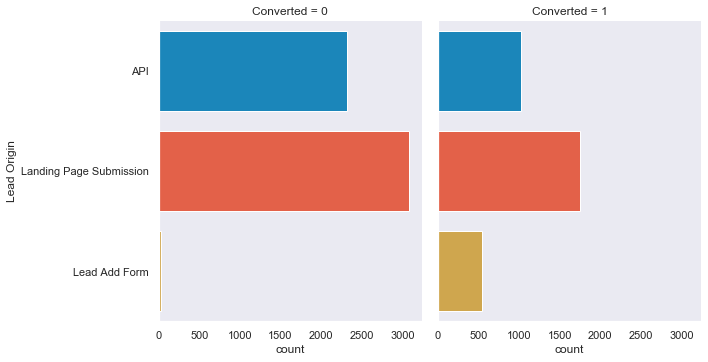

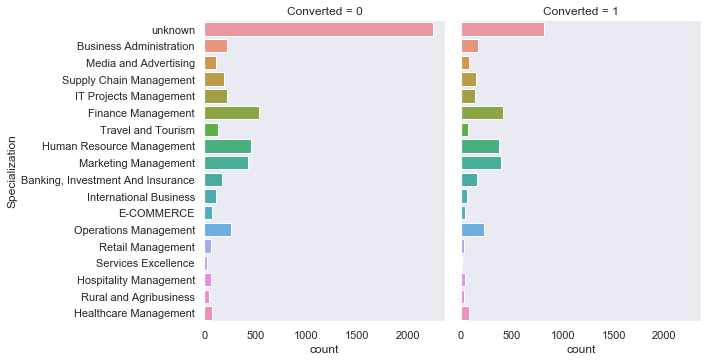

In [1029]:
# Bivariate Analysis of Categorical Columns
for c in cat_col:
    cat_col_bivariate_analysis('Converted',c)

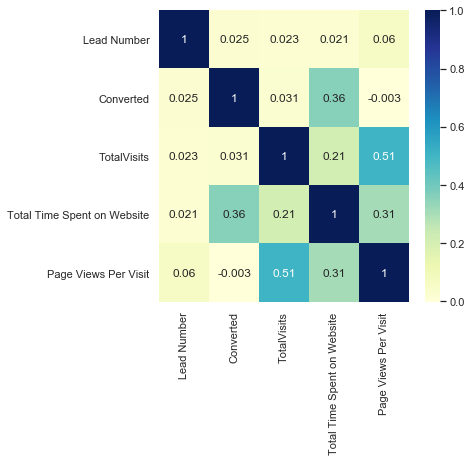

In [1030]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(5, 5))
sns.heatmap(leads.corr(), cmap="YlGnBu",annot=True)
plt.show()

In [1031]:
##### Summary: Upon observing numerous plots above in EDA, we conclude the following points:

### Univariate Analysis Conclusion:

##### There is low variation in Page Views Per Visit and TotalVisits but higher variation in Total Time Spent on Website
##### There are a lot of outliers in Page Views Per Visit and TotalVisits which needs to be treated before modelling

### Bivariate Analysis Conclusion:

##### There is positive correlation between Total Time Spent on Website and Conversion
##### There is some correlation between Conversion and some categorical columns like Lead Origin and Lead Source

#### Lead Source - Welingak website and Reference are having significant influence in conversion
#### Working Professionals are the target who are getting significantly converted from leads
#### Add Lead Form is performing better than landing page and API for conversion

### Correlation Analysis (Heatmap) Conclusion:

##### There is positive correlation between Total Time Spent on Website and Conversion
##### There is almost no correlation in Page Views Per Visit and TotalVisits with Conversion

## Preparing Data

### Encoding Categorical to Numerical Categories

In [1032]:
leads['Do Not Email'] = leads['Do Not Email'].replace('No', 0)
leads['Do Not Email'] = leads['Do Not Email'].replace('Yes', 1)

leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].replace('No', 0)
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].replace('Yes', 1)

In [1033]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,unknown,Unemployed,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,unknown,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,unknown,Unemployed,0,Modified


In [1034]:
leads.shape

(8749, 13)

In [1035]:
leads['Do Not Email'] = leads['Do Not Email'].astype('uint8')
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].astype('uint8')

In [1036]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8749 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Lead Number                             8749 non-null   uint32  
 1   Lead Origin                             8749 non-null   category
 2   Lead Source                             8749 non-null   category
 3   Do Not Email                            8749 non-null   uint8   
 4   Converted                               8749 non-null   uint8   
 5   TotalVisits                             8749 non-null   float32 
 6   Total Time Spent on Website             8749 non-null   uint16  
 7   Page Views Per Visit                    8749 non-null   float32 
 8   Last Activity                           8749 non-null   object  
 9   Specialization                          8749 non-null   object  
 10  What is your current occupation         8749 non

### Outliear Treatment

In [1037]:
#Performing soft capping
#TotalVisits & Page view per visit has outliers

In [1038]:
leads['TotalVisits'].quantile([0.9, 0.95, 0.97, 0.99, 0.98, 0.995])

0.900     7.0
0.950    10.0
0.970    11.0
0.990    17.0
0.980    13.0
0.995    21.0
Name: TotalVisits, dtype: float64

In [1039]:
leads['Page Views Per Visit'].quantile([0.9, 0.95, 0.97, 0.99, 0.98, 0.995])

0.900     5.0
0.950     6.0
0.970     7.0
0.990     9.0
0.980     8.0
0.995    11.0
Name: Page Views Per Visit, dtype: float64

In [1040]:
#Performing capping @ 98 % and 2%
high_cap = 0.98
low_cap = 0.02

#Capping all value greater than 0.95 to q1
for i in ['TotalVisits', 'Page Views Per Visit']:
    q1 = leads[i].quantile(high_cap)
    leads[i][leads[i]>=q1] = q1
    
    q2 = leads[i].quantile(low_cap)
    leads[i][leads[i]<=q2] = q2

In [1041]:
leads.shape

(8749, 13)

### Checking if Dataset is skewed

In [1042]:
skw_rt_per = (sum(leads['Converted'])/len(leads['Converted'].index))*100
skw_rt_per

37.75288604411933

**Assessment** - It is not skewed as it has 37% conversion

In [1043]:
final_df_for_dummy_col = leads.columns

### Dummy Variable

In [1044]:
leads = pd.get_dummies(leads, drop_first=True)
leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_unknown
0,660737,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0


In [1045]:
leads.shape

(8749, 54)

### Test - Train Split

In [1046]:
from sklearn.model_selection import train_test_split

In [1047]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_unknown
0,660737,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
2,660727,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,660681,0,2.0,1428,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0


In [1048]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: uint8

In [1049]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1050]:
print('X train shape :', X_train.shape)
print('y train shape :', y_train.shape)
print('X test shape :', X_test.shape)
print('y test shape :', y_test.shape)

X train shape : (6124, 53)
y train shape : (6124,)
X test shape : (2625, 53)
y test shape : (2625,)


### Scaling the data

In [1051]:
from sklearn.preprocessing import StandardScaler

In [1052]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_unknown
7821,589803,0,-0.438896,-0.305331,-0.190036,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
7103,595003,0,-1.095017,-0.896703,-1.219833,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
6861,597096,0,-1.095017,-0.896703,-1.219833,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
5710,606165,0,-0.110836,-0.636719,0.324863,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7829,589735,0,-1.095017,-0.896703,-1.219833,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [1053]:
X_train.shape

(6124, 53)

### Checking - corr()

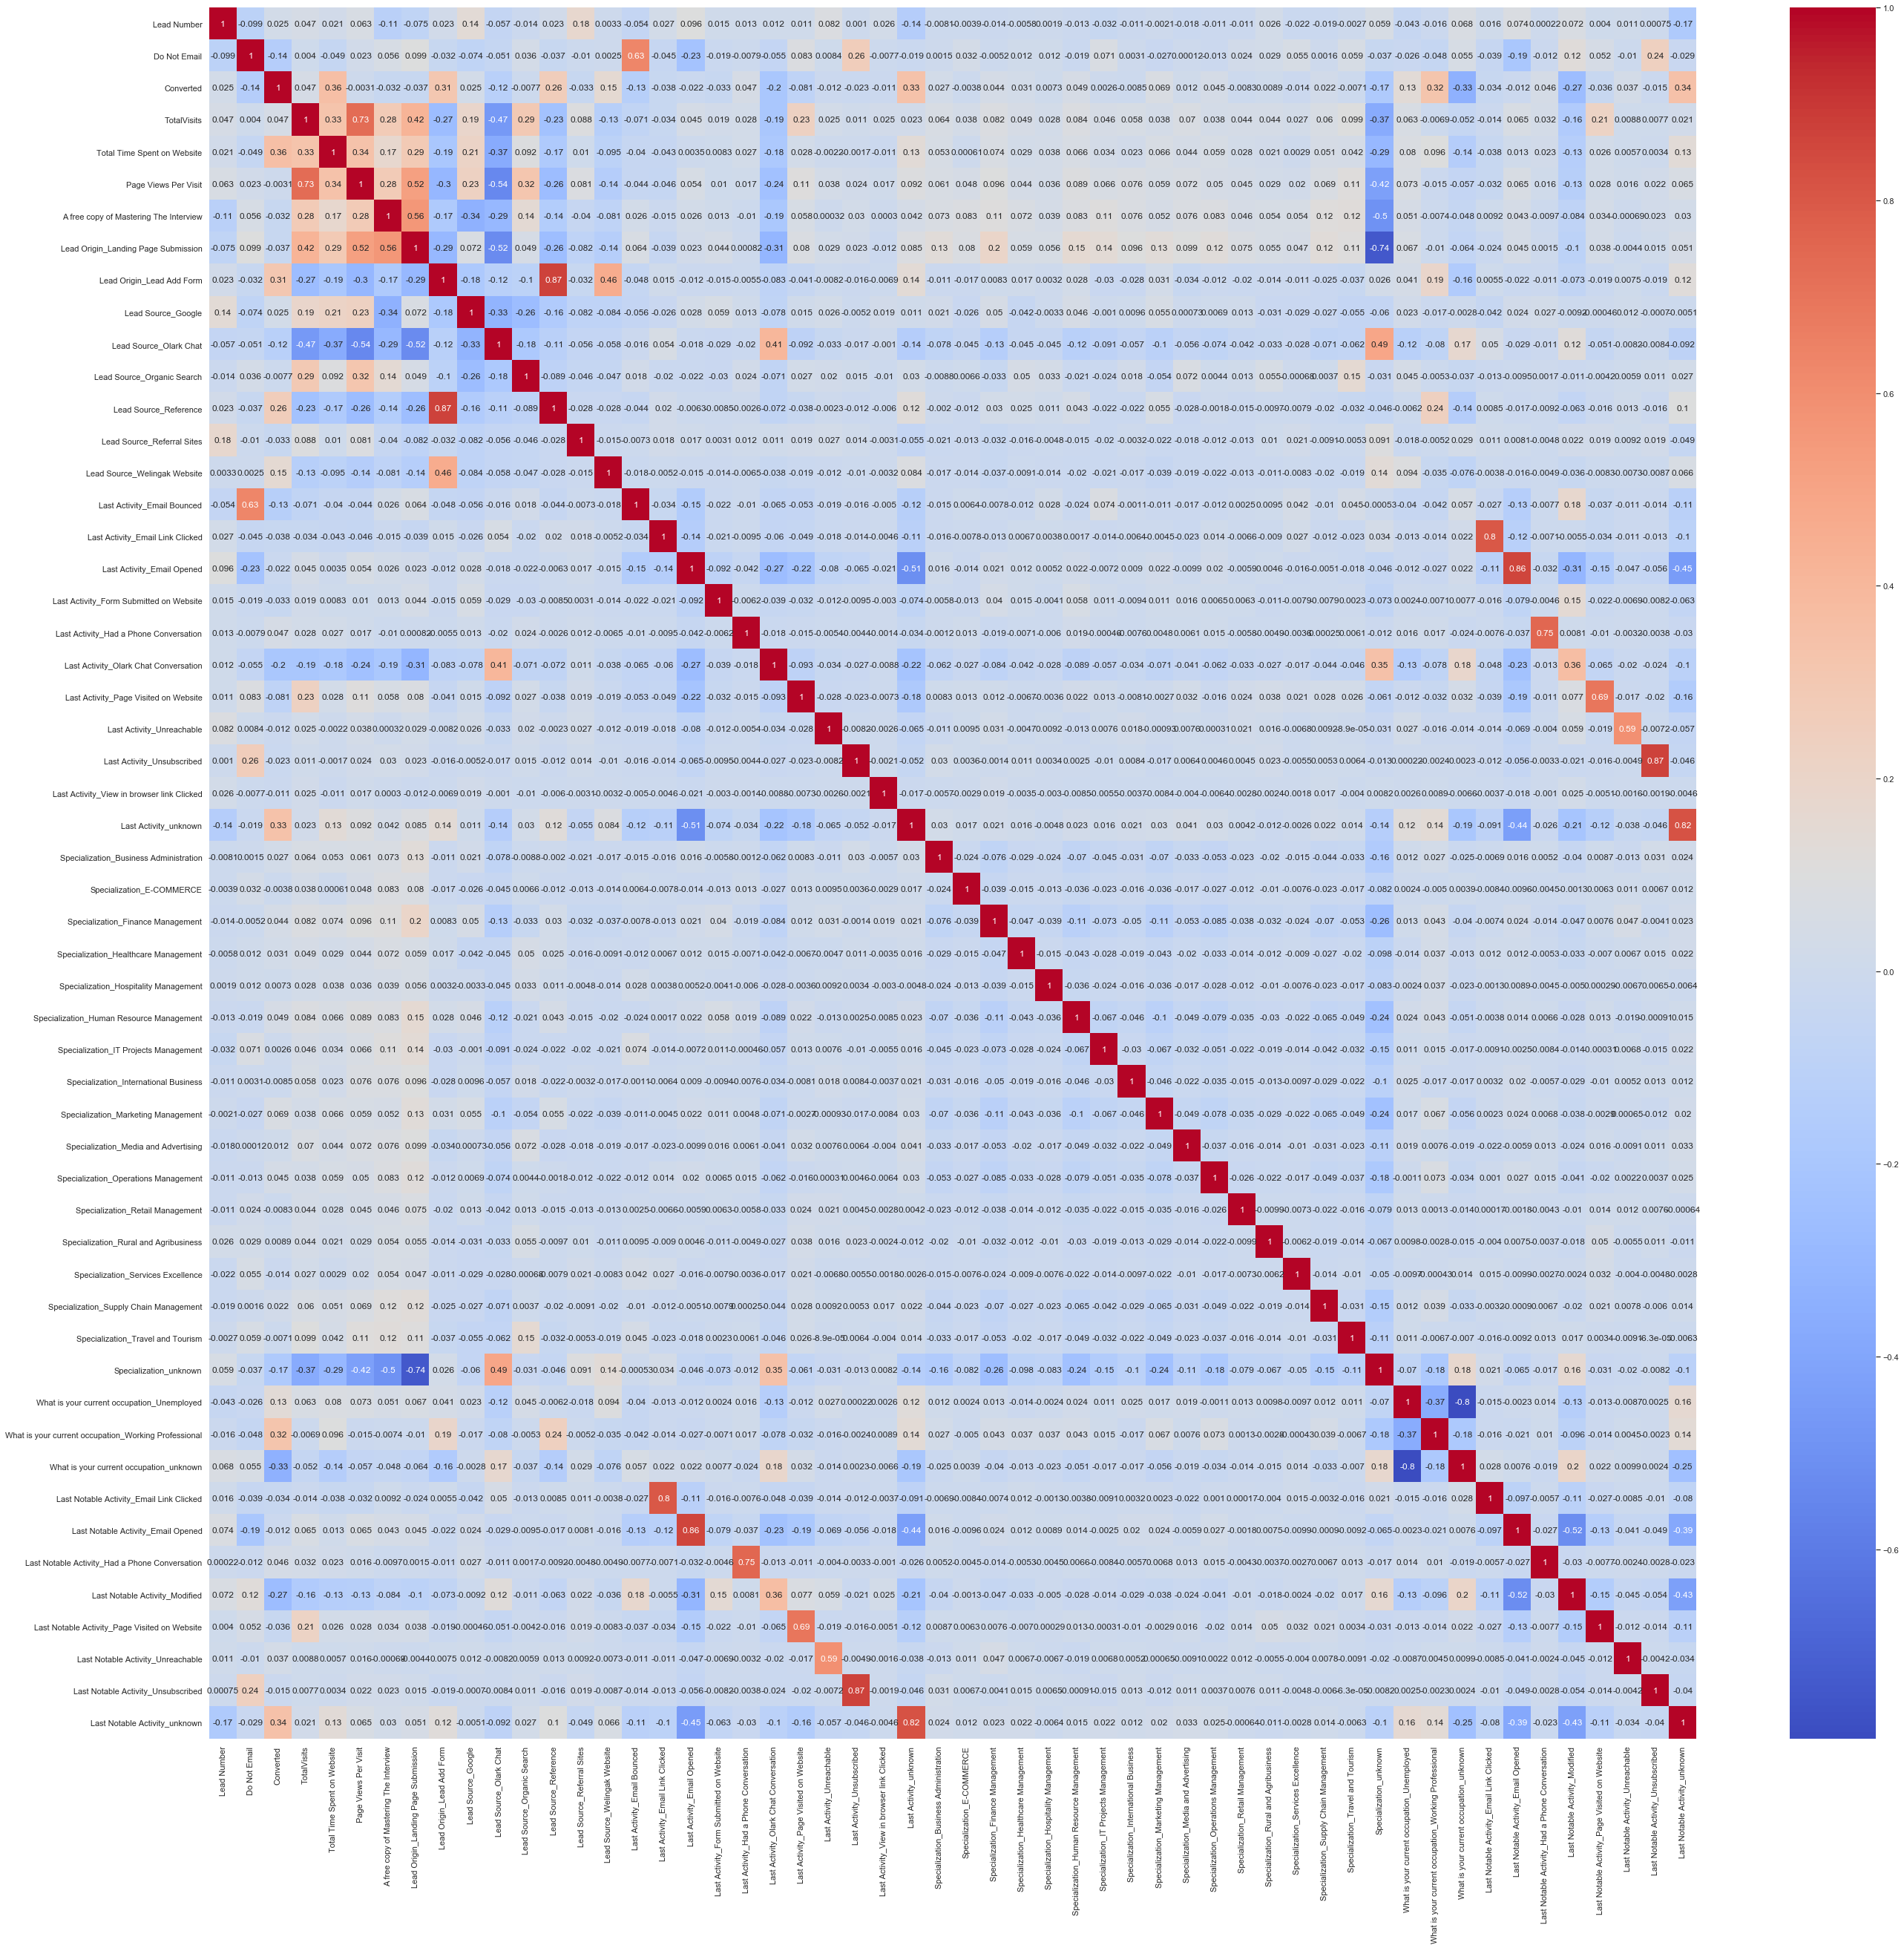

In [1054]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,40))        # Size of the figure
sns.heatmap(leads.corr(),annot = True, cmap = 'coolwarm')
plt.show()

**Assessment** 
1. Last Activity & Last Notable Activity have higher corr(), hence dropping the Last Notable Activity associated columns
2. Specilization details are not filled by all the leads from source the `Olark Chat`. Need to identify whats wrong in UI or input cells

In [1055]:
df_col_list = leads.columns
drop_col_list = df_col_list[df_col_list.str.contains('^Last No.*')]
drop_col_list

Index(['Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed', 'Last Notable Activity_unknown'],
      dtype='object')

In [1056]:
# 8 columns are removed from both train and test because of multi-corr()
X_train.drop(drop_col_list, axis = 1, inplace = True)
X_test.drop(drop_col_list, axis = 1, inplace = True)
print('X train shape :', X_train.shape)
print('X test shape :', X_test.shape)

X train shape : (6124, 45)
X test shape : (2625, 45)


In [1057]:
X_train.head(25)

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,...,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown
7821,589803,0,-0.438896,-0.305331,-0.190036,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7103,595003,0,-1.095017,-0.896703,-1.219833,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
6861,597096,0,-1.095017,-0.896703,-1.219833,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5710,606165,0,-0.110836,-0.636719,0.324863,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7829,589735,0,-1.095017,-0.896703,-1.219833,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5028,611560,0,0.545285,0.068167,1.354660,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
6779,597857,0,-0.438896,-0.720939,-0.190036,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3810,623548,0,-0.438896,1.758063,-0.190036,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2691,633876,0,1.201406,0.833472,0.582312,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4272,618983,0,0.545285,0.112108,0.067414,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [1058]:
X_test.head(25)

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,...,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown
7561,591651,0,3.0,1421,3.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8500,584821,1,6.0,229,6.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
7347,593063,0,3.0,1199,3.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4650,615108,0,6.0,74,3.00,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4255,619137,0,7.0,136,3.50,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2117,639324,0,2.0,151,2.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7416,592650,0,0.0,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8219,587146,0,7.0,247,1.75,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2401,636666,0,4.0,75,4.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
786,652194,0,2.0,1058,2.00,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [1059]:
train_lead_number = X_train['Lead Number']
X_train.drop(['Lead Number'], axis = 1, inplace = True)

In [1060]:
test_lead_number = X_test.pop('Lead Number')

In [1061]:
train_lead_number.head(25)

7821    589803
7103    595003
6861    597096
5710    606165
7829    589735
5028    611560
6779    597857
3810    623548
2691    633876
4272    618983
4769    614132
1702    642846
5236    609592
5762    605580
4761    614200
3015    630875
3372    627806
748     652701
6039    603499
5283    609249
9071    580800
218     658206
5356    608758
635     653930
1986    640415
Name: Lead Number, dtype: uint32

In [1062]:
train_lead_number = train_lead_number.astype('str')

In [1063]:
print('X train shape :', X_train.shape)
print('X test shape :', X_test.shape)

X train shape : (6124, 44)
X test shape : (2625, 44)


## Building Model

### Running first model

In [1064]:
import statsmodels.api as sm

In [1065]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6124
Model:                            GLM   Df Residuals:                     6079
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2427.2
Date:                Mon, 07 Dec 2020   Deviance:                       4854.4
Time:                        17:15:28   Pearson chi2:                 5.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4144      0.385     -3.671      0.000      -2.169      -0.659
Do Not Email                                            -1.4017      0.218     -6.434      0.000      -1.829      -0.975
TotalVisits                                              0.3172      0.054      5.864      0.000       0.211       0.423
Total Time Spent on Website                              1.0636      0.042     25.516      0.000       0.982       1.145
Page Views Per Visit                                    -0.2573      0.059     -4.341      0.000      -0.373      -0.141
A free copy of Mastering The Interview                  -0.1959      0.110     -1.785      0.074      -0.411       0.019
Lead Origin_Landing Page Submission                     -0.6102      0.140     -4.354      0.000      -0.885      -0.335
Lead Origin_Lead Add Form                               -0.9231      1.535     -0.601      0.548      -3.932       2.086
Lead Source_Google                                       0.2280      0.117      1.952      0.051      -0.001       0.457
Lead Source_Olark Chat                                   1.3846      0.170      8.125      0.000       1.051       1.719
Lead Source_Organic Search                               0.2000      0.133      1.509      0.131      -0.060       0.460
Lead Source_Reference                                    4.4283      1.562      2.835      0.005       1.367       7.489
Lead Source_Referral Sites                               0.1456      0.342      0.426      0.670      -0.524       0.815
Lead Source_Welingak Website                             6.3526      1.706      3.724      0.000       3.009       9.696
Last Activity_Email Bounced                              0.4283      0.463      0.925      0.355      -0.479       1.336
Last Activity_Email Link Clicked                         0.7305      0.310      2.353      0.019       0.122       1.339
Last Activity_Email Opened                               1.2651      0.227      5.570      0.000       0.820       1.710
Last Activity_Form Submitted on Website                  0.2469      0.391      0.631      0.528      -0.520       1.013
Last Activity_Had a Phone Conversation                   3.5748      0.722      4.952      0.000       2.160       4.990
Last Activity_Olark Chat Conversation                   -0.1643      0.280     -0.587      0.558      -0.713       0.385
Last Activity_Page Visited on Website                    0.8131      0.266      3.056      0.002       0.292       1.335
Last Activity_Unreachable                                1.3493      0.379      3.565      0.000       0.607       2.091
Last Activity_Unsubscribed                               2

### Feature Selection using RFE

In [1066]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [1067]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [1068]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('A free copy of Mastering The Interview', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', True, 1),
 ('Last Activity_View in browser link Cli

In [1069]:
rfe_col = rfe.support_

In [1070]:
col = X_train.columns[rfe_col]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Last Activity_unknown',
       'Specialization_Hospitality Management',
       'Specialization_Services Excellence', 'Specialization_unknown',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown'],
      dtype='object')

### Assessing the new model after RFE

#### Re-building the model : V2

In [1071]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6124
Model:                            GLM   Df Residuals:                     6103
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2457.2
Date:                Mon, 07 Dec 2020   Deviance:                       4914.5
Time:                        17:15:31   Pearson chi2:                 5.97e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2863      0.198     -6.485      0.000      -1.675      -0.898
Do Not Email                                            -1.3459      0.195     -6.887      0.000      -1.729      -0.963
Total Time Spent on Website                              1.0724      0.041     25.948      0.000       0.991       1.153
Lead Origin_Landing Page Submission                     -0.8431      0.130     -6.477      0.000      -1.098      -0.588
Lead Origin_Lead Add Form                               -1.0373      1.580     -0.656      0.512      -4.134       2.060
Lead Source_Olark Chat                                   1.1563      0.129      8.933      0.000       0.903       1.410
Lead Source_Reference                                    4.3035      1.602      2.687      0.007       1.164       7.443
Lead Source_Welingak Website                             6.2276      1.743      3.573      0.000       2.812       9.644
Last Activity_Email Link Clicked                         0.6905      0.269      2.564      0.010       0.163       1.218
Last Activity_Email Opened                               1.1848      0.171      6.914      0.000       0.849       1.521
Last Activity_Had a Phone Conversation                   3.7152      0.708      5.248      0.000       2.328       5.103
Last Activity_Olark Chat Conversation                   -0.2061      0.234     -0.879      0.379      -0.665       0.253
Last Activity_Page Visited on Website                    0.9044      0.211      4.287      0.000       0.491       1.318
Last Activity_Unreachable                                1.3148      0.345      3.808      0.000       0.638       1.991
Last Activity_Unsubscribed                               2.0126      0.498      4.041      0.000       1.036       2.989
Last Activity_unknown                                    2.2640      0.173     13.103      0.000       1.925       2.603
Specialization_Hospitality Management                   -0.7561      0.364     -2.078      0.038      -1.469      -0.043
Specialization_Services Excellence                      -0.6101      0.741     -0.823      0.411      -2.063       0.843
Specialization_unknown                                  -0.9376      0.125     -7.495      0.000      -1.183      -0.692
What is your current occupation_Working Professional     2.4616      0.200     12.330      0.000       2.070       2.853
What is your current occupation_unknown                 -1.3105      0.094    -14.005      0.000      -1.494      -1.127
========================================================================================================================
"""

#### Checking for VIF : V2

In [1072]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1073]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,196.90
5,Lead Source_Reference,154.75
6,Lead Source_Welingak Website,43.86
2,Lead Origin_Landing Page Submission,4.16
8,Last Activity_Email Opened,3.34
17,Specialization_unknown,2.96
14,Last Activity_unknown,2.79
4,Lead Source_Olark Chat,2.26
10,Last Activity_Olark Chat Conversation,1.98
19,What is your current occupation_unknown,1.56


**Assessment** - The `Lead Origin_Lead Add form` has a very high colinearity. Hence dropping it.

#### Re-building the model : V3

In [1074]:
col = col.drop('Lead Origin_Lead Add Form')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Last Activity_unknown',
       'Specialization_Hospitality Management',
       'Specialization_Services Excellence', 'Specialization_unknown',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown'],
      dtype='object')

In [1075]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6124
Model:                            GLM   Df Residuals:                     6104
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2457.5
Date:                Mon, 07 Dec 2020   Deviance:                       4914.9
Time:                        17:15:32   Pearson chi2:                 5.96e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2875      0.198     -6.493      0.000      -1.676      -0.899
Do Not Email                                            -1.3453      0.195     -6.885      0.000      -1.728      -0.962
Total Time Spent on Website                              1.0718      0.041     25.938      0.000       0.991       1.153
Lead Origin_Landing Page Submission                     -0.8414      0.130     -6.466      0.000      -1.096      -0.586
Lead Source_Olark Chat                                   1.1521      0.129      8.910      0.000       0.899       1.406
Lead Source_Reference                                    3.2661      0.255     12.815      0.000       2.767       3.766
Lead Source_Welingak Website                             5.1889      0.730      7.113      0.000       3.759       6.619
Last Activity_Email Link Clicked                         0.6911      0.269      2.566      0.010       0.163       1.219
Last Activity_Email Opened                               1.1843      0.171      6.912      0.000       0.848       1.520
Last Activity_Had a Phone Conversation                   3.7143      0.708      5.248      0.000       2.327       5.102
Last Activity_Olark Chat Conversation                   -0.2045      0.234     -0.873      0.383      -0.664       0.255
Last Activity_Page Visited on Website                    0.9012      0.211      4.272      0.000       0.488       1.315
Last Activity_Unreachable                                1.3144      0.345      3.807      0.000       0.638       1.991
Last Activity_Unsubscribed                               2.0119      0.498      4.040      0.000       1.036       2.988
Last Activity_unknown                                    2.2638      0.173     13.104      0.000       1.925       2.602
Specialization_Hospitality Management                   -0.7556      0.364     -2.077      0.038      -1.469      -0.042
Specialization_Services Excellence                      -0.6098      0.741     -0.823      0.411      -2.062       0.843
Specialization_unknown                                  -0.9353      0.125     -7.481      0.000      -1.180      -0.690
What is your current occupation_Working Professional     2.4619      0.200     12.334      0.000       2.071       2.853
What is your current occupation_unknown                 -1.3096      0.094    -13.998      0.000      -1.493      -1.126
========================================================================================================================
"""

#### Checking for VIF : V3

In [1076]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.16
7,Last Activity_Email Opened,3.34
16,Specialization_unknown,2.96
13,Last Activity_unknown,2.79
3,Lead Source_Olark Chat,2.26
9,Last Activity_Olark Chat Conversation,1.98
18,What is your current occupation_unknown,1.56
4,Lead Source_Reference,1.41
10,Last Activity_Page Visited on Website,1.38
1,Total Time Spent on Website,1.31


**Assessment** - All VIF are less than 5, but p-value of `Specialization_Services Excellence` is very high. Hence dropping it

#### Re-building the model : V4

In [1077]:
col = col.drop('Specialization_Services Excellence')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Last Activity_unknown',
       'Specialization_Hospitality Management', 'Specialization_unknown',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown'],
      dtype='object')

In [1078]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6124
Model:                            GLM   Df Residuals:                     6105
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2457.8
Date:                Mon, 07 Dec 2020   Deviance:                       4915.6
Time:                        17:15:32   Pearson chi2:                 5.97e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2873      0.198     -6.492      0.000      -1.676      -0.899
Do Not Email                                            -1.3579      0.195     -6.963      0.000      -1.740      -0.976
Total Time Spent on Website                              1.0722      0.041     25.949      0.000       0.991       1.153
Lead Origin_Landing Page Submission                     -0.8420      0.130     -6.471      0.000      -1.097      -0.587
Lead Source_Olark Chat                                   1.1518      0.129      8.907      0.000       0.898       1.405
Lead Source_Reference                                    3.2684      0.255     12.823      0.000       2.769       3.768
Lead Source_Welingak Website                             5.1911      0.730      7.115      0.000       3.761       6.621
Last Activity_Email Link Clicked                         0.6820      0.269      2.532      0.011       0.154       1.210
Last Activity_Email Opened                               1.1830      0.171      6.907      0.000       0.847       1.519
Last Activity_Had a Phone Conversation                   3.7155      0.708      5.246      0.000       2.327       5.104
Last Activity_Olark Chat Conversation                   -0.2056      0.234     -0.878      0.380      -0.665       0.254
Last Activity_Page Visited on Website                    0.9003      0.211      4.269      0.000       0.487       1.314
Last Activity_Unreachable                                1.3149      0.345      3.809      0.000       0.638       1.991
Last Activity_Unsubscribed                               2.0230      0.498      4.063      0.000       1.047       2.999
Last Activity_unknown                                    2.2621      0.173     13.100      0.000       1.924       2.601
Specialization_Hospitality Management                   -0.7537      0.364     -2.071      0.038      -1.467      -0.041
Specialization_unknown                                  -0.9335      0.125     -7.466      0.000      -1.179      -0.688
What is your current occupation_Working Professional     2.4581      0.199     12.329      0.000       2.067       2.849
What is your current occupation_unknown                 -1.3093      0.094    -13.996      0.000      -1.493      -1.126
========================================================================================================================
"""

#### Checking for VIF : V4

In [1079]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.16
7,Last Activity_Email Opened,3.34
15,Specialization_unknown,2.96
13,Last Activity_unknown,2.79
3,Lead Source_Olark Chat,2.26
9,Last Activity_Olark Chat Conversation,1.98
17,What is your current occupation_unknown,1.56
4,Lead Source_Reference,1.41
10,Last Activity_Page Visited on Website,1.38
1,Total Time Spent on Website,1.31


**Assessment** - All VIF are less than 5, but p-value of `Last Activity_Olark Chat Conversation` is very high. Hence dropping it

#### Re-building the model : V5

In [1080]:
col = col.drop('Last Activity_Olark Chat Conversation')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Last Activity_unknown',
       'Specialization_Hospitality Management', 'Specialization_unknown',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown'],
      dtype='object')

In [1081]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6124
Model:                            GLM   Df Residuals:                     6106
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2458.2
Date:                Mon, 07 Dec 2020   Deviance:                       4916.4
Time:                        17:15:33   Pearson chi2:                 5.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3866      0.165     -8.412      0.000      -1.710      -1.064
Do Not Email                                            -1.3402      0.194     -6.893      0.000      -1.721      -0.959
Total Time Spent on Website                              1.0723      0.041     25.931      0.000       0.991       1.153
Lead Origin_Landing Page Submission                     -0.8405      0.130     -6.455      0.000      -1.096      -0.585
Lead Source_Olark Chat                                   1.1376      0.128      8.872      0.000       0.886       1.389
Lead Source_Reference                                    3.2688      0.255     12.821      0.000       2.769       3.768
Lead Source_Welingak Website                             5.1855      0.729      7.113      0.000       3.757       6.614
Last Activity_Email Link Clicked                         0.7875      0.242      3.249      0.001       0.312       1.263
Last Activity_Email Opened                               1.2859      0.127     10.106      0.000       1.037       1.535
Last Activity_Had a Phone Conversation                   3.8135      0.699      5.453      0.000       2.443       5.184
Last Activity_Page Visited on Website                    0.9996      0.180      5.560      0.000       0.647       1.352
Last Activity_Unreachable                                1.4139      0.327      4.319      0.000       0.772       2.055
Last Activity_Unsubscribed                               2.1084      0.489      4.307      0.000       1.149       3.068
Last Activity_unknown                                    2.3626      0.132     17.927      0.000       2.104       2.621
Specialization_Hospitality Management                   -0.7560      0.364     -2.077      0.038      -1.469      -0.043
Specialization_unknown                                  -0.9391      0.125     -7.519      0.000      -1.184      -0.694
What is your current occupation_Working Professional     2.4693      0.200     12.363      0.000       2.078       2.861
What is your current occupation_unknown                 -1.3110      0.094    -14.021      0.000      -1.494      -1.128
========================================================================================================================
"""

#### Checking for VIF : V5

In [1082]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.36
7,Last Activity_Email Opened,2.47
14,Specialization_unknown,2.40
12,Last Activity_unknown,2.26
3,Lead Source_Olark Chat,1.91
16,What is your current occupation_unknown,1.53
4,Lead Source_Reference,1.35
1,Total Time Spent on Website,1.30
9,Last Activity_Page Visited on Website,1.27
0,Do Not Email,1.27


**Assessment** - These features are having good p-value and VIF, lets try finding the accuracy

In [1083]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7821    0.565028
7103    0.296552
6861    0.102037
5710    0.051666
7829    0.518818
5028    0.527453
6779    0.140294
3810    0.856250
2691    0.309296
4272    0.563561
dtype: float64

In [1084]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.56502792, 0.29655212, 0.10203654, 0.05166621, 0.51881838,
       0.52745346, 0.14029423, 0.85624962, 0.30929577, 0.56356092])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [1085]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

In [1086]:
y_train_pred_final['Lead Number'] = train_lead_number.values
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.565028,589803
1,0,0.296552,595003
2,0,0.102037,597096
3,0,0.051666,606165
4,1,0.518818,589735


#### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [1087]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.565028,589803,1
1,0,0.296552,595003,0
2,0,0.102037,597096,0
3,0,0.051666,606165,0
4,1,0.518818,589735,1


## Evaluating the Model & Cut-off

In [1088]:
from sklearn import metrics

In [1089]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3384  422]
 [ 666 1652]]


In [1090]:
# Predicted     not_converted    converted
# Actual
# not_converted        3384      422
# converted            666       1652  

In [1091]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8223383409536251


**Assessment** - The model is 82% accurate in predicting with the set-cutoff and features

### Metrics other than Accuracy

In [1092]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1093]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7126833477135461

In [1094]:
# Let us calculate specificity
TN / float(TN+FP)

0.8891224382553863

In [1095]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11087756174461377


In [1096]:
# positive predictive value 
print (TP / float(TP+FP))

0.7965284474445516


In [1097]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8355555555555556


### Plotting the ROC Curve

In [1098]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1099]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

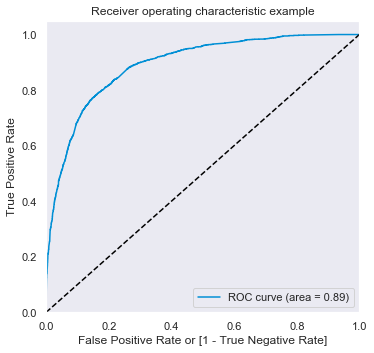

In [1100]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**Assessment** - The Built model is accurate with ROC curve area value of 0.89

### Finding the optimal cut-off

In [1101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(25)

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.565028,589803,1,1,1,1,1,1,1,0,0,0,0
1,0,0.296552,595003,0,1,1,1,0,0,0,0,0,0,0
2,0,0.102037,597096,0,1,1,0,0,0,0,0,0,0,0
3,0,0.051666,606165,0,1,0,0,0,0,0,0,0,0,0
4,1,0.518818,589735,1,1,1,1,1,1,1,0,0,0,0
5,0,0.527453,611560,1,1,1,1,1,1,1,0,0,0,0
6,0,0.140294,597857,0,1,1,0,0,0,0,0,0,0,0
7,1,0.856250,623548,1,1,1,1,1,1,1,1,1,1,0
8,0,0.309296,633876,0,1,1,1,1,0,0,0,0,0,0
9,1,0.563561,618983,1,1,1,1,1,1,1,0,0,0,0


In [1102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378511  1.000000  0.000000
0.1   0.1  0.606140  0.974978  0.381503
0.2   0.2  0.750653  0.914582  0.650815
0.3   0.3  0.799641  0.844262  0.772465
0.4   0.4  0.818746  0.780846  0.841829
0.5   0.5  0.822338  0.712683  0.889122
0.6   0.6  0.805683  0.607852  0.926169
0.7   0.7  0.786414  0.522433  0.947189
0.8   0.8  0.760124  0.415013  0.970310
0.9   0.9  0.725016  0.293788  0.987651


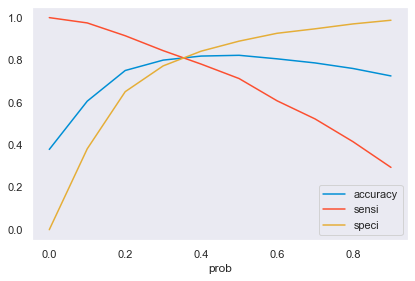

In [1103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**Assessment** - Choosing a cut-off of 0.3 based on the business problem as we want to capture as much as probable lead who can be converted

#### Taking 0.3 as a cutoff probability.

In [1104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.565028,589803,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.296552,595003,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.102037,597096,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.051666,606165,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.518818,589735,1,1,1,1,1,1,1,0,0,0,0,1


In [1105]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7996407576747224

In [1106]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2940,  866],
       [ 361, 1957]], dtype=int64)

In [1107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1108]:
#sensitivity
TP / float(TP+FN)

0.8442622950819673

In [1109]:
#specificity
TN / float(TN+FP)

0.7724645296899633

In [1110]:
#false postive rate
print(FP/ float(TN+FP))

0.2275354703100368


In [1111]:
#Positive predictive value 
print (TP / float(TP+FP))

0.6932341480694297


In [1112]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8906392002423508


In [1113]:
#Recall
#TP / TP + FN
print(TP/ float(TN + FN))

0.5928506513177825


In [1114]:
y_train_pred_final['Z Score'] = round(y_train_pred_final['Conversion_Prob'] * 100 , 2)
req_col = ['Converted', 'Lead Number', 'final_predicted', 'Z Score']

y_train_pred_final = y_train_pred_final[req_col]

In [1115]:
y_train_pred_final

,Converted,Lead Number,final_predicted,Z Score
0,0,589803,1,56.50
1,0,595003,0,29.66
2,0,597096,0,10.20
3,0,606165,0,5.17
4,1,589735,1,51.88
...,...,...,...,...
6119,1,656483,1,96.54
6120,1,659704,1,88.56
6121,0,584842,1,63.49
6122,0,593130,0,0.47


In [1116]:
X_train_sm.shape

(6124, 18)

### Making prediction in test data

In [1117]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1118]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Page Visited on Website,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_unknown,Specialization_Hospitality Management,Specialization_unknown,What is your current occupation_Working Professional,What is your current occupation_unknown
7561,0,1.704968,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8500,1,-0.477433,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7347,0,1.298514,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4650,0,-0.761219,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4255,0,-0.647704,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [1119]:
X_test_sm = sm.add_constant(X_test)

In [1120]:
y_test_pred = res.predict(X_test_sm)

In [1121]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head(10)

,0
7561,0.401578
8500,0.012239
7347,0.821687
4650,0.147109
4255,0.049890
2117,0.058426
7416,0.104357
8219,0.153918
2401,0.120266
786,0.247581


In [1122]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1123]:
# Putting CustID to index
y_test_df['Lead Number'] = test_lead_number

In [1124]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1125]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,0,591651,0.401578
1,0,584821,0.012239
2,1,593063,0.821687
3,0,615108,0.147109
4,0,619137,0.049890


In [1126]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [1127]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final['Z Score'] = round(y_pred_final['Conversion_Prob'] * 100 , 2)
y_pred_final.head()

,Converted,Lead Number,Conversion_Prob,final_predicted,Z Score
0,0,591651,0.401578,1,40.16
1,0,584821,0.012239,0,1.22
2,1,593063,0.821687,1,82.17
3,0,615108,0.147109,0,14.71
4,0,619137,0.049890,0,4.99


In [1128]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7977142857142857

In [1129]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1255,  385],
       [ 146,  839]], dtype=int64)

In [1130]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1131]:
#sensitivity
TP / float(TP+FN)

0.8517766497461929

In [1132]:
#specificity
TN / float(TN+FP)

0.7652439024390244

In [1133]:
#Recall
print(TP/ float(TN + FN))

0.5988579586009993


## Final Result

In [1134]:
final_result = pd.concat([y_train_pred_final, y_pred_final])
final_result.drop(['Converted', 'Conversion_Prob', 'final_predicted'], axis =1, inplace = True)
final_result.head(5)

,Lead Number,Z Score
0,589803,56.50
1,595003,29.66
2,597096,10.20
3,606165,5.17
4,589735,51.88


In [1135]:
actual_leads_df = pd.read_csv('Leads.csv', usecols = final_df_for_dummy_col)
actual_leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [1136]:
result_df = pd.merge(actual_leads_df, final_result, how = 'inner', on = 'Lead Number')
result_df.shape

(2625, 14)

In [1137]:
result_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Z Score
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,24.05
1,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,23.58
2,660608,Landing Page Submission,Organic Search,No,1,8.0,1351,8.0,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened,67.91
3,660562,API,Organic Search,No,1,11.0,1538,11.0,Email Opened,Marketing Management,Unemployed,No,Modified,87.62
4,660540,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,No,Modified,3.04


**Assessment**
    - Z Score is added to the main dataframe now and the sales team can now prioritize the call based on the Z Score
    - Z Score value `greater 30%` are the canditates who are likely to get converted.